In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [ ]:
file_paths = '/final_combined.xlsx'  # Adjust path if needed

final_data = pd.read_excel(file_paths)

In [ ]:
final_data.head()

,Unnamed: 0,ID,Name,Role,Transcript,Resume,decision,Reason for decision,Job Description,num_words_in_transcript,"Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects that used Java, but I didn't really have a leading role or anything.\n\n**Interviewer:** I see. In a software engineering role, being able to write high-quality, efficient code is crucial. Can you give me an example of a particularly challenging coding problem you've solved in the past? How did you approach it?\n\n**Alice Smith:** Well, there was this one time...I think it was a homework assignment or something. We had to implement a sorting algorithm, and I chose to use...um...merge sort, I think? I don't really remember the details, but it was a while ago.\n\n**Interviewer:** Merge sort is a good choice. But can you tell me more about the specifics of how you implemented it? For example, how did you handle edge cases or optimize the algorithm for performance?\n\n**Alice Smith:** (pauses) Honestly, I don't really remember. I mean, I wrote the code, but I don't recall the details of how I handled edge cases or anything like that.\n\n**Interviewer:** I understand that it's been a while since you wrote the code, but as a software engineer, being able to recall and explain the details of your work is important. Can you tell me about your experience with any specific software development methodologies, such as Agile or Scrum?\n\n**Alice Smith:** (nervously) Uh, I've heard of those...I think? We used something like that on a project once, but I don't really remember the specifics. I'm sure it's not that important.\n\n**Interviewer:** (pausing, considering whether to continue the line of questioning) Okay, let's move on to some technical questions. Can you explain the difference between a stack and a queue data structure?\n\n**Alice Smith:** (hesitates) Um...I think a stack is like...a pile of plates? And a queue is like...a line of people?\n\n**Interviewer:** (surprised) That's not quite correct. A stack is a last-in, first-out data structure, whereas a queue is a first-in, first-out data structure. Let's move on to the next question.\n\n**Interviewer:** (quickly wrapping up the interview) Well, Alice, thank you for coming in today. Do you have any questions for me?\n\n**Alice Smith:** (relieved) Yeah, actually. What's the company culture like here?\n\n**Interviewer:** (smiling politely) That's a great question. We're a collaborative and innovative team. We're always looking for ways to improve our processes and technology. We'll be in touch soon to let you know about next steps.\n\n**Interviewer:** (to themselves) Not sure if this candidate is a good fit for the role..."
0,0.0,brenbr359,brent brown,product manager,product manager interview transcript\n\ninterv...,here's a sample resume for brent brown applyin...,select,experience,we are looking for a skilled product manager w...,620.0,NaN
1,1.0,jameay305,james ayala,software engineer,software engineer interview transcript\n\ninte...,here's a sample resume for james ayala applyin...,select,experience,we are looking for a skilled software engineer...,687.0,NaN
2,2.0,scotri565,scott rivera,data engineer,here is a simulated 

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 11 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [ ]:
# Step 2: Data Cleaning
# Standardize column names
final_data.columns = [col.strip().lower().replace(" ", "_") for col in final_data.columns]

# Handle missing values
final_data.fillna("Unknown", inplace=True)

# Remove duplicates
final_data.drop_duplicates(inplace=True)

<ipython-input-10-a0c8184d9f82>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  final_data.fillna("Unknown", inplace=True)


In [ ]:
final_data.head()

,unnamed:_0,id,name,role,transcript,resume,decision,reason_for_decision,job_description,num_words_in_transcript,"here's_a_simulated_interview_for_a_software_engineer_role:\n\n**interviewer:**_hi_alice,_thank_you_for_coming_in_today._can_you_start_by_telling_me_a_little_bit_about_your_background_and_why_you're_interested_in_this_software_engineer_role?\n\n**alice_smith:**_yeah,_sure._so,_i_have_a_degree_in_computer_science,_and_i've_been_working_in_the_field_for_about_three_years_now._i'm_interested_in_this_role_because_i_enjoy_coding_and_problem-solving,_and_i_think_this_company_does_some_really_interesting_work.\n\n**interviewer:**_great,_thanks_for_sharing_that._can_you_walk_me_through_your_experience_with_a_specific_programming_language?_let's_say_java._how_have_you_used_java_in_previous_projects?\n\n**alice_smith:**_um,_i've_used_java_before...i_think._i_mean,_i've_written_some_java_code,_but_i_don't_really_remember_the_specifics._i've_worked_on_a_few_projects_that_used_java,_but_i_didn't_really_have_a_leading_role_or_anything.\n\n**interviewer:**_i_see._in_a_software_engineering_role,_being_able_to_write_high-quality,_efficient_code_is_crucial._can_you_give_me_an_example_of_a_particularly_challenging_coding_problem_you've_solved_in_the_past?_how_did_you_approach_it?\n\n**alice_smith:**_well,_there_was_this_one_time...i_think_it_was_a_homework_assignment_or_something._we_had_to_implement_a_sorting_algorithm,_and_i_chose_to_use...um...merge_sort,_i_think?_i_don't_really_remember_the_details,_but_it_was_a_while_ago.\n\n**interviewer:**_merge_sort_is_a_good_choice._but_can_you_tell_me_more_about_the_specifics_of_how_you_implemented_it?_for_example,_how_did_you_handle_edge_cases_or_optimize_the_algorithm_for_performance?\n\n**alice_smith:**_(pauses)_honestly,_i_don't_really_remember._i_mean,_i_wrote_the_code,_but_i_don't_recall_the_details_of_how_i_handled_edge_cases_or_anything_like_that.\n\n**interviewer:**_i_understand_that_it's_been_a_while_since_you_wrote_the_code,_but_as_a_software_engineer,_being_able_to_recall_and_explain_the_details_of_your_work_is_important._can_you_tell_me_about_your_experience_with_any_specific_software_development_methodologies,_such_as_agile_or_scrum?\n\n**alice_smith:**_(nervously)_uh,_i've_heard_of_those...i_think?_we_used_something_like_that_on_a_project_once,_but_i_don't_really_remember_the_specifics._i'm_sure_it's_not_that_important.\n\n**interviewer:**_(pausing,_considering_whether_to_continue_the_line_of_questioning)_okay,_let's_move_on_to_some_technical_questions._can_you_explain_the_difference_between_a_stack_and_a_queue_data_structure?\n\n**alice_smith:**_(hesitates)_um...i_think_a_stack_is_like...a_pile_of_plates?_and_a_queue_is_like...a_line_of_people?\n\n**interviewer:**_(surprised)_that's_not_quite_correct._a_stack_is_a_last-in,_first-out_data_structure,_whereas_a_queue_is_a_first-in,_first-out_data_structure._let's_move_on_to_the_next_question.\n\n**interviewer:**_(quickly_wrapping_up_the_interview)_well,_alice,_thank_you_for_coming_in_today._do_you_have_any_questions_for_me?\n\n**alice_smith:**_(relieved)_yeah,_actually._what's_the_company_culture_like_here?\n\n**interviewer:**_(smiling_politely)_that's_a_great_question._we're_a_collaborative_and_innovative_team._we're_always_looking_for_ways_to_improve_our_processes_and_technology._we'll_be_in_touch_soon_to_let_you_know_about_next_steps.\n\n**interviewer:**_(to_themselves)_not_sure_if_this_candidate_is_a_good_fit_for_the_role..."
0,0.0,brenbr359,brent brown,product manager,product manager interview transcript\n\ninterv...,here's a sample resume for brent brown applyin...,select,experience,we are looking for a skilled product manager w...,620.0,Unknown
1,1.0,jameay305,james ayala,software engineer,software engineer interview transcript\n\ninte...,here's a sample resume for james ayala applyin...,select,experience,we are looking for a skilled software engineer...,687.0,Unknown
2,2.0,scotri565,scott rivera,data engineer,here is a si

<ipython-input-43-d3f97955abda>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(final_data, x='transcript_word_count', y='decision', inner='box', palette='Dark2')


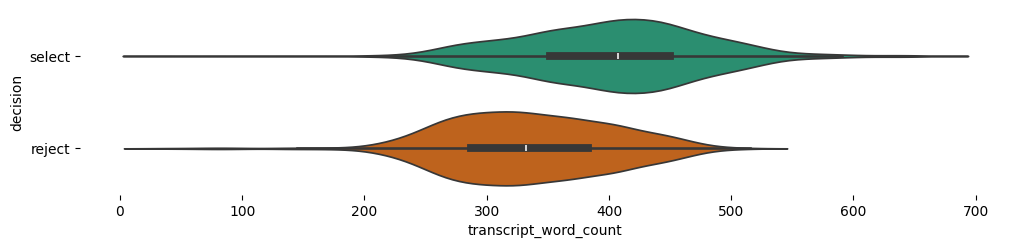

In [ ]:
# decision vs transcript_word_count this while show how long transcript of interview should have a higher chances of getting selected.


from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(final_data['decision'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(final_data, x='transcript_word_count', y='decision', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

The violin plot visualizes the distribution of transcript word counts for each decision outcome (e.g., 'select', 'reject'). By examining the shape and position of the violins, you can potentially gain insights such as:

1. Relationship between transcript length and selection:
Observe whether there's a noticeable difference in the distribution of transcript word counts between selected and rejected candidates. If selected candidates tend to have longer transcripts (wider violin shape or higher median), it suggests that longer interview conversations might be associated with a higher chance of selection.
2. Distribution of word counts:
 Look for the overall shape of the violins. Are they skewed, symmetric, or multimodal? This can provide insights into the variability of transcript lengths for each decision outcome. For example, a wider violin for selected candidates might indicate a greater range of acceptable transcript lengths.
3. Outliers:
 Check for any outliers (data points outside the whiskers of the box plot) in the violin plots. These could represent unusually long or short transcripts that might warrant further investigation.
4. Comparison across decisions:
 Compare the violins for different decision outcomes to identify any patterns or differences. For example, if the violin for selected candidates is shifted towards higher word counts compared to rejected candidates, it strengthens the hypothesis that longer transcripts are favored.

<ipython-input-42-99f581ea8c6b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(final_data, x='resume_word_count', y='decision', inner='box', palette='Dark2')


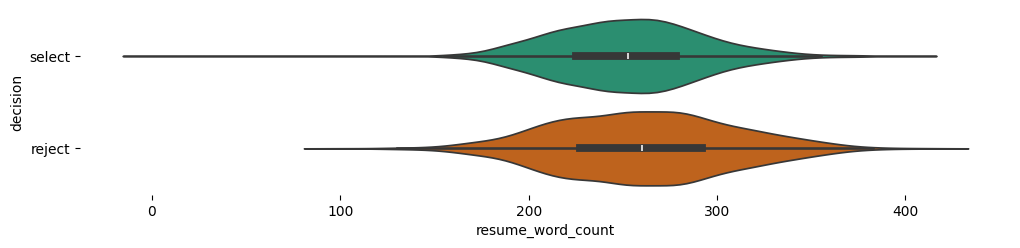

In [ ]:
# decision vs resume_word_count this while show how detailed resume should have a higher chances of getting selected.

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(final_data['decision'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(final_data, x='resume_word_count', y='decision', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

The violin plot you've generated visualizes the distribution of resume word counts for each decision outcome (e.g., 'select', 'reject'). Here's a breakdown of the insights you can potentially extract:

1. Relationship between Resume Length and Selection:
Observe the width and median of the violins for 'select' and 'reject' decisions. If the 'select' violin is wider or has a higher median compared to the 'reject' violin, it suggests that candidates with longer resumes (more detailed information) might have a higher chance of being selected.
Look for any significant overlap between the violins. Substantial overlap indicates that resume length might not be a strong predictor of selection on its own. However, if there's minimal overlap and the distributions are clearly separated, it suggests a stronger relationship.
2. Distribution of Word Counts:
Examine the shape of the violins. Are they skewed, symmetric, or multimodal? This provides insights into the variability of resume lengths for each decision outcome. For example, a wider violin for 'select' candidates might indicate a broader range of acceptable resume lengths.
3. Outliers:
Check for any outliers (data points outside the whiskers of the box plot within the violins). Outliers represent unusually long or short resumes that might require further investigation. They could be candidates with exceptionally detailed resumes or those who have omitted important information.
4. Overall Insight:
Based on the combined observations, you can infer whether a detailed resume, as indicated by higher word counts, is generally associated with a higher chance of selection. If the 'select' violin is consistently wider or has a higher median and minimal overlap with the 'reject' violin, it supports the hypothesis that detailed resumes are favored.

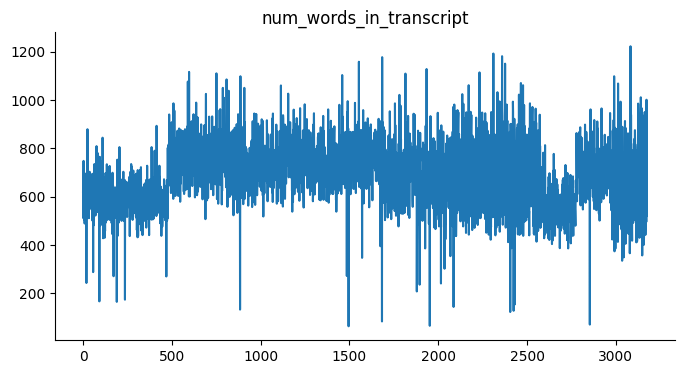

In [ ]:
# Number of words in transcript show that the we come to know how long the conversion is get long.

from matplotlib import pyplot as plt
final_data['num_words_in_transcript'].plot(kind='line', figsize=(8, 4), title='num_words_in_transcript')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Step 3: Data Preprocessing
# Convert decision to categorical type
final_data['decision'] = final_data['decision'].astype('category')

In [ ]:
final_data['decision'] = final_data['decision'].str.lower()  # Convert to lowercase
final_data['decision'] = final_data['decision'].replace({
    'select': 'select',
    'selected': 'select',
    'reject': 'reject',
    'rejected': 'reject'
})


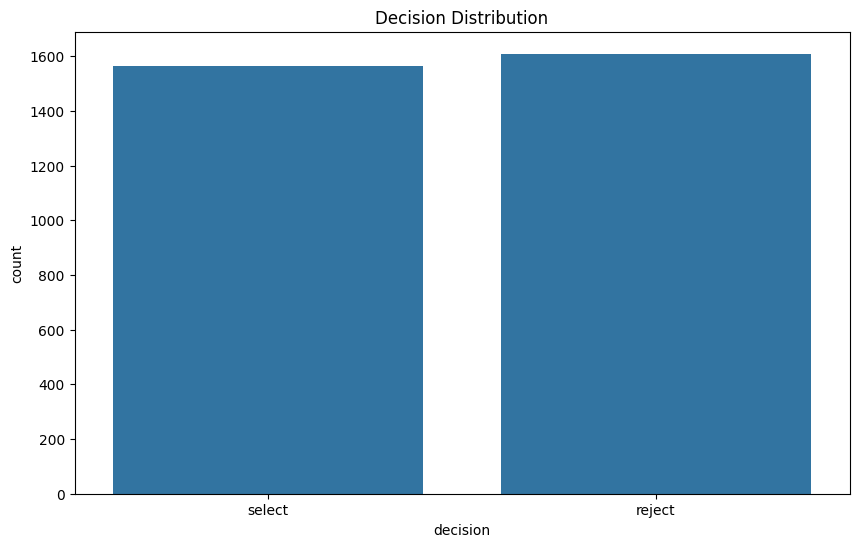

In [ ]:
# Step 4: Exploratory Data Analysis
# Univariate Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=final_data, x='decision')
plt.title("Decision Distribution")
plt.show()

In [ ]:
# Display all unique roles in the 'roles' column
unique_roles = final_data['role'].unique()
print(unique_roles)


['product manager' 'software engineer' 'data engineer' 'ui engineer'
 'data scientist' 'data analyst' 'ui designer' 'Data Scientist'
 'Data Analyst' 'Software Engineer' 'Product Manager' 'Data Engineer'
 'UI Designer' 'Digital Marketing Specialist' 'Cybersecurity Specialist'
 'HR Specialist' 'Network Engineer' 'Graphic Designer' 'Game Developer'
 'Mobile App Developer' 'Cloud Architect' 'Business Analyst'
 'Database Administrator' 'DevOps Engineer' 'Machine Learning Engineer'
 'Content Writer' 'System Administrator' 'UI/UX Designer' 'AI Engineer'
 'UI Engineer' 'Project Manager' 'Software Developer']


In [ ]:
# Mapping dictionary for grouping roles
role_mapping = {
    'Software Developer': 'Software Engineer',
    'Software Engineer': 'Software Engineer',
    'Data Engineer': 'Data Analyst',
    'Data Analyst': 'Data Analyst',
    'UI/UX Designer': 'UI/UX Designer',
    'UI Engineer': 'UI/UX Designer',
    'UI Designer': 'UI/UX Designer',
    'Cybersecurity Specialist': 'Cybersecurity Specialist',
    'Network Engineer': 'Cybersecurity Specialist',
    'Cloud Architect': 'Cloud Architect',
    'DevOps Engineer': 'Cloud Architect',
    'AI Engineer': 'AI Engineer',
    'Machine Learning Engineer': 'AI Engineer',
    'System Administrator': 'System Administrator',
    'Database Administrator': 'System Administrator',
    'Digital Marketing Specialist': 'Digital Marketing Specialist',
    'Content Writer': 'Digital Marketing Specialist',
    'Graphic Designer': 'Mobile Game Developer',
    'Game Developer': 'Mobile Game Developer',
    'Mobile App Developer': 'Mobile Game Developer',
    'HR Specialis': 'Digital Marketing Specialist',
    'HR Specialist' : 'Digital Marketing Specialist',
    'Project Manager' : 'System Administrator'
}


In [ ]:
# Apply the mapping to group roles
final_data['role'] = final_data['role'].replace(role_mapping)

# Check the unique values after grouping
print(final_data['role'].unique())


['product manager' 'software engineer' 'data engineer' 'ui engineer'
 'data scientist' 'data analyst' 'ui designer' 'Data Scientist'
 'Data Analyst' 'Software Engineer' 'Product Manager' 'UI/UX Designer'
 'Digital Marketing Specialist' 'Cybersecurity Specialist'
 'Mobile Game Developer' 'Cloud Architect' 'Business Analyst'
 'System Administrator' 'AI Engineer']


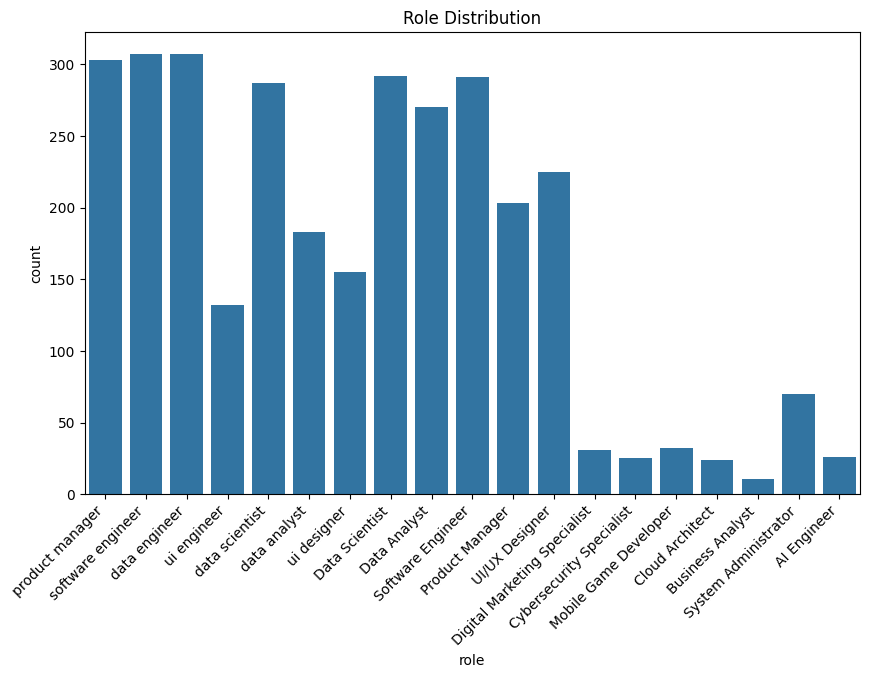

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=final_data, x='role')
plt.title("Role Distribution")
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees
plt.show()


In [ ]:
# Calculate the number of words in the 'Transcript' column
final_data['num_words_in_transcript'] = final_data['transcript'].apply(lambda x: len(str(x).split()))


In [ ]:
# Group by Role and decision and calculate mean, median, and standard deviation
aggregated_data = final_data.groupby(['role', 'decision'])['num_words_in_transcript'].agg(['mean', 'median', 'std']).reset_index()


In [ ]:
print(aggregated_data)

                            role decision        mean  median         std
0                    AI Engineer   reject  614.545455   584.0   84.985132
1                    AI Engineer   select  732.933333   754.0  172.415804
2               Business Analyst   reject  616.400000   578.0  110.323615
3               Business Analyst   select  693.833333   693.5   54.802980
4                Cloud Architect   reject  594.375000   621.0   65.038313
5                Cloud Architect   select  722.312500   718.5   64.263747
6       Cybersecurity Specialist   reject  586.733333   553.0  109.979522
7       Cybersecurity Specialist   select  748.000000   771.0   68.593812
8                   Data Analyst   reject  570.944444   557.0  106.858823
9                   Data Analyst   select  760.095238   766.0  134.671775
10                Data Scientist   reject  613.764286   585.0  104.118265
11                Data Scientist   select  740.282895   738.0  135.136596
12  Digital Marketing Specialist   rej

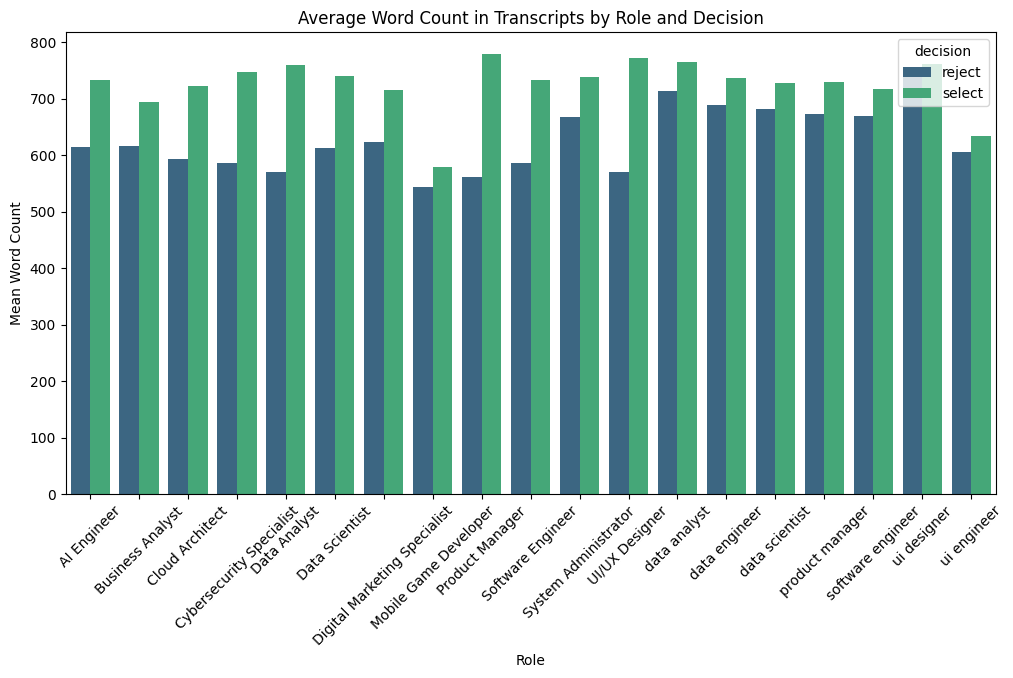

In [ ]:
# Bar plot for mean word count by Role and decision
plt.figure(figsize=(12, 6))
sns.barplot(data=aggregated_data, x='role', y='mean', hue='decision', palette='viridis')
plt.title('Average Word Count in Transcripts by Role and Decision')
plt.xlabel('Role')
plt.ylabel('Mean Word Count')
plt.xticks(rotation=45)
plt.show()


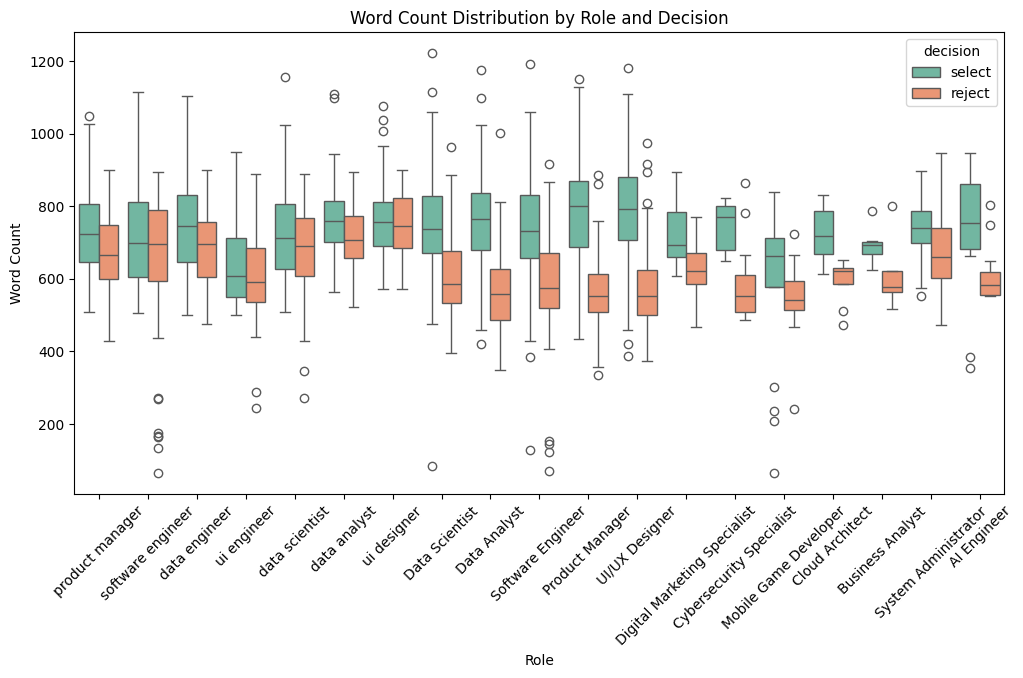

In [ ]:
# Box plot for distribution of word count by Role and decision
plt.figure(figsize=(12, 6))
sns.boxplot(data=final_data, x='role', y='num_words_in_transcript', hue='decision', palette='Set2')
plt.title('Word Count Distribution by Role and Decision')
plt.xlabel('Role')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.show()


Word Count as a Predictor:

1. Longer and more detailed responses correlate with a higher likelihood of selection for most roles.
2. Specific roles, such as AI Engineer, Product Manager, and Cybersecurity Specialist, show the strongest positive correlation between word count and selection.
3. Roles like Mobile Game Developer require less detail overall, as both selected and rejected candidates tend to have lower word counts.
4. Roles like Product Manager and AI Engineer place a premium on detailed responses.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Text preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(str(text).lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(tokens)

# Apply preprocessing
for col in ['transcript', 'resume', 'reason_for_decision', 'job_description']:
    final_data[col] = final_data[col].apply(preprocess_text)

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 11 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [ ]:
# Feature: Word count
final_data['transcript_word_count'] = final_data['transcript'].apply(lambda x: len(str(x).split()))
final_data['resume_word_count'] = final_data['resume'].apply(lambda x: len(str(x).split()))


In [ ]:
# Sentiment analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
final_data['transcript_sentiment'] = final_data['transcript'].apply(lambda x: sia.polarity_scores(x)['compound'])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# TF-IDF vectorization and similarity scores
vectorizer = TfidfVectorizer()
job_desc_vectors = vectorizer.fit_transform(final_data['job_description'])
resume_vectors = vectorizer.transform(final_data['resume'])
transcript_vectors = vectorizer.transform(final_data['transcript'])

In [ ]:
final_data['resume_job_similarity'] = [cosine_similarity(resume_vectors[i], job_desc_vectors[i])[0][0] for i in range(len(final_data))]
final_data['transcript_job_similarity'] = [cosine_similarity(transcript_vectors[i], job_desc_vectors[i])[0][0] for i in range(len(final_data))]


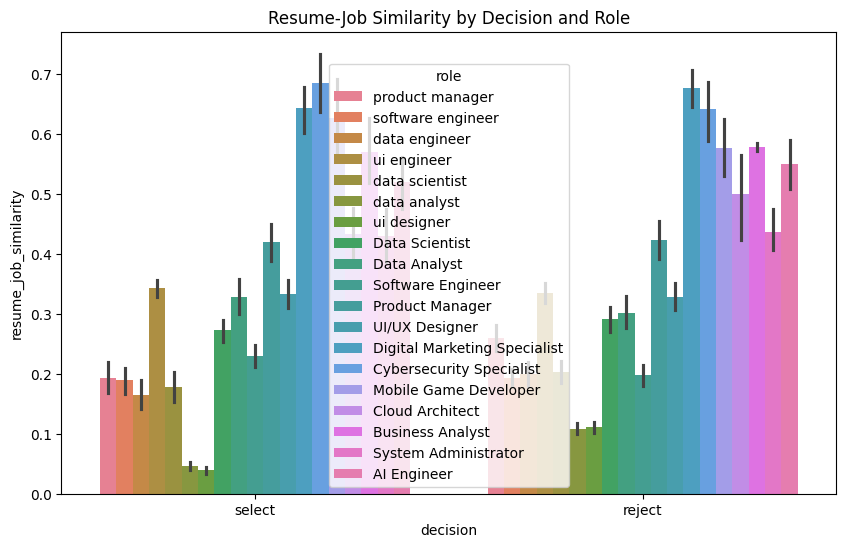

In [ ]:
# Visualization example: Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=final_data, x='decision', y='resume_job_similarity', hue='role')
plt.title("Resume-Job Similarity by Decision and Role")
plt.show()

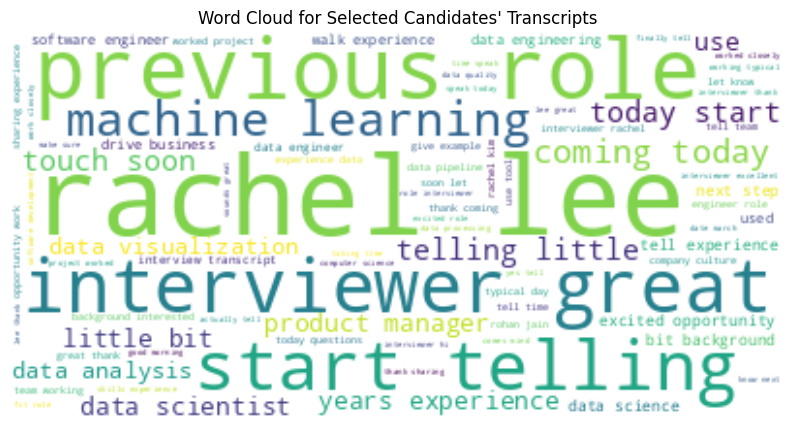

In [ ]:
# Word cloud for selected candidates
selected_transcripts = " ".join(final_data[final_data['decision'] == 'select']['transcript'])
wordcloud = WordCloud(background_color='white').generate(selected_transcripts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Selected Candidates' Transcripts")
plt.show()

In [ ]:
final_data.head()

,unnamed:_0,id,name,role,transcript,resume,decision,reason_for_decision,job_description,num_words_in_transcript,"here's_a_simulated_interview_for_a_software_engineer_role:\n\n**interviewer:**_hi_alice,_thank_you_for_coming_in_today._can_you_start_by_telling_me_a_little_bit_about_your_background_and_why_you're_interested_in_this_software_engineer_role?\n\n**alice_smith:**_yeah,_sure._so,_i_have_a_degree_in_computer_science,_and_i've_been_working_in_the_field_for_about_three_years_now._i'm_interested_in_this_role_because_i_enjoy_coding_and_problem-solving,_and_i_think_this_company_does_some_really_interesting_work.\n\n**interviewer:**_great,_thanks_for_sharing_that._can_you_walk_me_through_your_experience_with_a_specific_programming_language?_let's_say_java._how_have_you_used_java_in_previous_projects?\n\n**alice_smith:**_um,_i've_used_java_before...i_think._i_mean,_i've_written_some_java_code,_but_i_don't_really_remember_the_specifics._i've_worked_on_a_few_projects_that_used_java,_but_i_didn't_really_have_a_leading_role_or_anything.\n\n**interviewer:**_i_see._in_a_software_engineering_role,_being_able_to_write_high-quality,_efficient_code_is_crucial._can_you_give_me_an_example_of_a_particularly_challenging_coding_problem_you've_solved_in_the_past?_how_did_you_approach_it?\n\n**alice_smith:**_well,_there_was_this_one_time...i_think_it_was_a_homework_assignment_or_something._we_had_to_implement_a_sorting_algorithm,_and_i_chose_to_use...um...merge_sort,_i_think?_i_don't_really_remember_the_details,_but_it_was_a_while_ago.\n\n**interviewer:**_merge_sort_is_a_good_choice._but_can_you_tell_me_more_about_the_specifics_of_how_you_implemented_it?_for_example,_how_did_you_handle_edge_cases_or_optimize_the_algorithm_for_performance?\n\n**alice_smith:**_(pauses)_honestly,_i_don't_really_remember._i_mean,_i_wrote_the_code,_but_i_don't_recall_the_details_of_how_i_handled_edge_cases_or_anything_like_that.\n\n**interviewer:**_i_understand_that_it's_been_a_while_since_you_wrote_the_code,_but_as_a_software_engineer,_being_able_to_recall_and_explain_the_details_of_your_work_is_important._can_you_tell_me_about_your_experience_with_any_specific_software_development_methodologies,_such_as_agile_or_scrum?\n\n**alice_smith:**_(nervously)_uh,_i've_heard_of_those...i_think?_we_used_something_like_that_on_a_project_once,_but_i_don't_really_remember_the_specifics._i'm_sure_it's_not_that_important.\n\n**interviewer:**_(pausing,_considering_whether_to_continue_the_line_of_questioning)_okay,_let's_move_on_to_some_technical_questions._can_you_explain_the_difference_between_a_stack_and_a_queue_data_structure?\n\n**alice_smith:**_(hesitates)_um...i_think_a_stack_is_like...a_pile_of_plates?_and_a_queue_is_like...a_line_of_people?\n\n**interviewer:**_(surprised)_that's_not_quite_correct._a_stack_is_a_last-in,_first-out_data_structure,_whereas_a_queue_is_a_first-in,_first-out_data_structure._let's_move_on_to_the_next_question.\n\n**interviewer:**_(quickly_wrapping_up_the_interview)_well,_alice,_thank_you_for_coming_in_today._do_you_have_any_questions_for_me?\n\n**alice_smith:**_(relieved)_yeah,_actually._what's_the_company_culture_like_here?\n\n**interviewer:**_(smiling_politely)_that's_a_great_question._we're_a_collaborative_and_innovative_team._we're_always_looking_for_ways_to_improve_our_processes_and_technology._we'll_be_in_touch_soon_to_let_you_know_about_next_steps.\n\n**interviewer:**_(to_themselves)_not_sure_if_this_candidate_is_a_good_fit_for_the_role...",transcript_word_count,resume_word_count,transcript_sentiment,resume_job_similarity,transcript_job_similarity
0,0.0,brenbr359,brent brown,product manager,product manager interview transcript interview...,sample resume brent brown applying role produc...,select,experience,looking skilled product manager expertise data...,620,Unknown,333,204,0.9985,0.330848,0.266701
1,1.0,jameay305,james ayala,software engineer,software engineer interview transcript intervi...,sample resume james ayala applying software en.

Observations:

1. Higher Resume-Job Similarity for Selected Candidates: Across most roles, candidates with higher similarity scores (bars closer to 1.0 on the Y-axis) are more likely to be selected. Examples: Data Scientist: Selected candidates have significantly higher similarity scores than rejected ones. AI Engineer: A clear gap between selected and rejected candidates, showing the importance of aligning resumes to the job description.

2. Roles with Less Impact of Resume Similarity: Some roles, such as System Administrator and UI/UX Designer, show smaller differences in resume-job similarity between selected and rejected candidates. This indicates that other factors (e.g., transcript quality or interview performance) may weigh more heavily in selection.

3. Rejected Candidates Scores Are Generally Lower: Most roles show that rejected candidates have lower resume-job similarity scores, supporting the idea that alignment with the job description is crucial.

In [ ]:
print(final_data.head())  # Check the first few rows
print(final_data.info())  # Check for missing or null values
print(final_data.describe())  # Summary statistics for numerical columns


  unnamed:_0         id          name               role  \
0        0.0  brenbr359   brent brown    product manager   
1        1.0  jameay305   james ayala  software engineer   
2        2.0  scotri565  scott rivera      data engineer   
3        3.0  emilke232   emily kelly        ui engineer   
4        4.0  ashlra638    ashley ray     data scientist   

                                          transcript  \
0  product manager interview transcript interview...   
1  software engineer interview transcript intervi...   
2  simulated interview scott rivera applying role...   
3  interview transcript emily kelly ui engineer p...   
4  data scientist interview transcript company no...   

                                              resume decision  \
0  sample resume brent brown applying role produc...   select   
1  sample resume james ayala applying software en...   select   
2  sample resume scott rivera applying role data ...   reject   
3  sample resume emily kelly emily kelly c

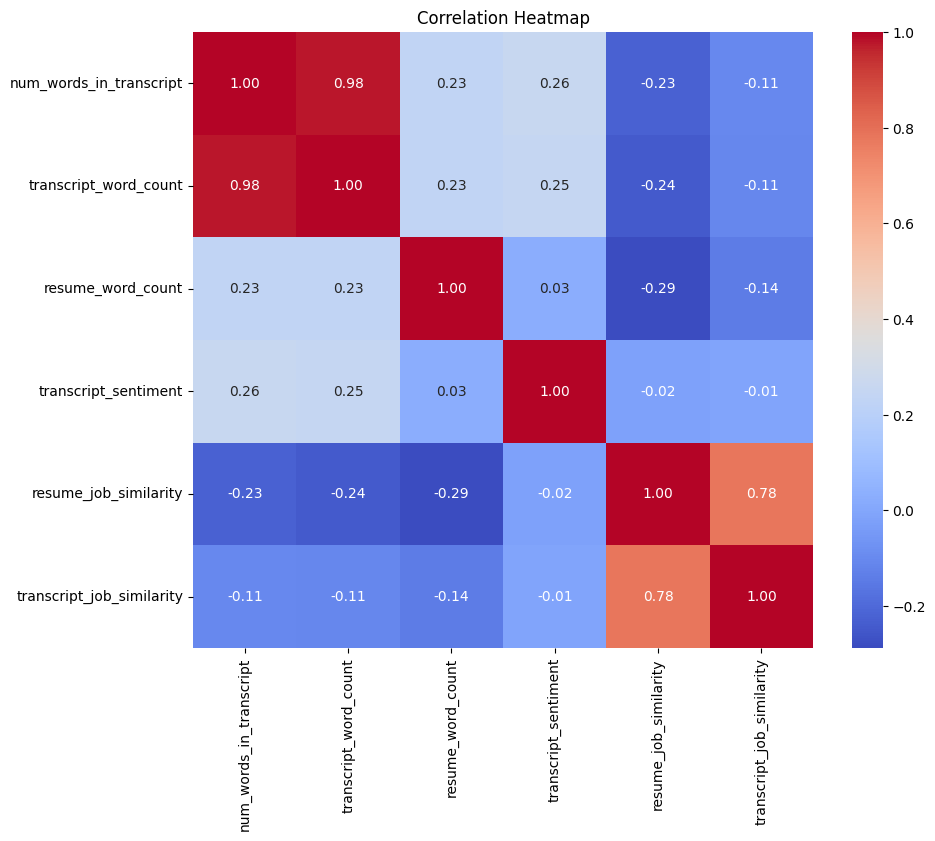

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(final_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


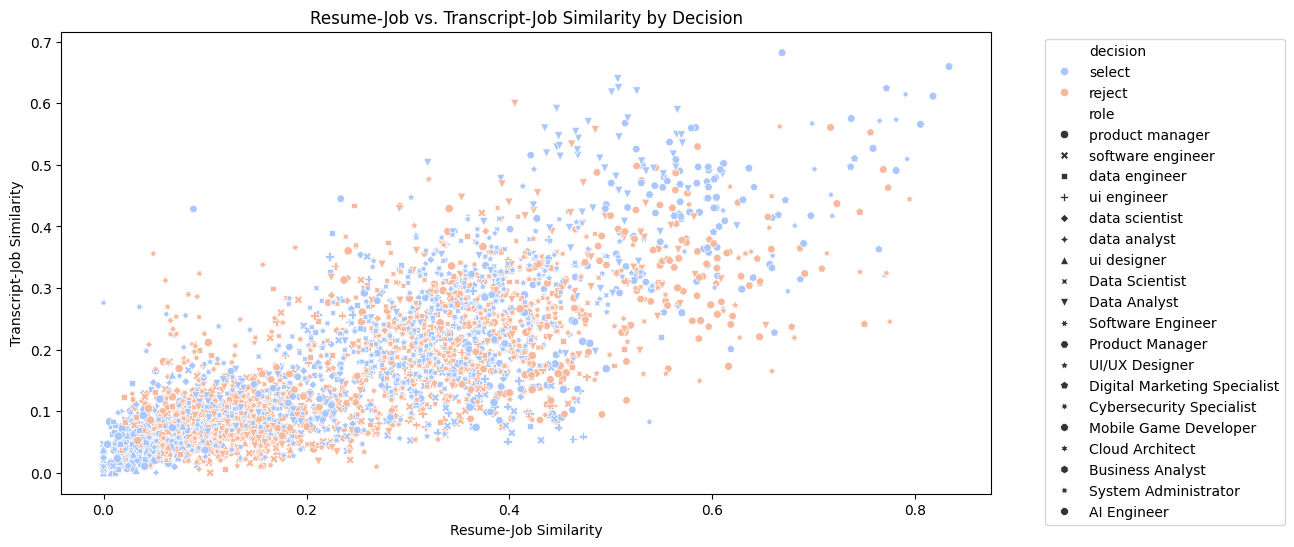

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=final_data,
    x='resume_job_similarity',
    y='transcript_job_similarity',
    hue='decision',
    style='role',
    palette='coolwarm'
)
plt.title("Resume-Job vs. Transcript-Job Similarity by Decision")
plt.xlabel("Resume-Job Similarity")
plt.ylabel("Transcript-Job Similarity")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


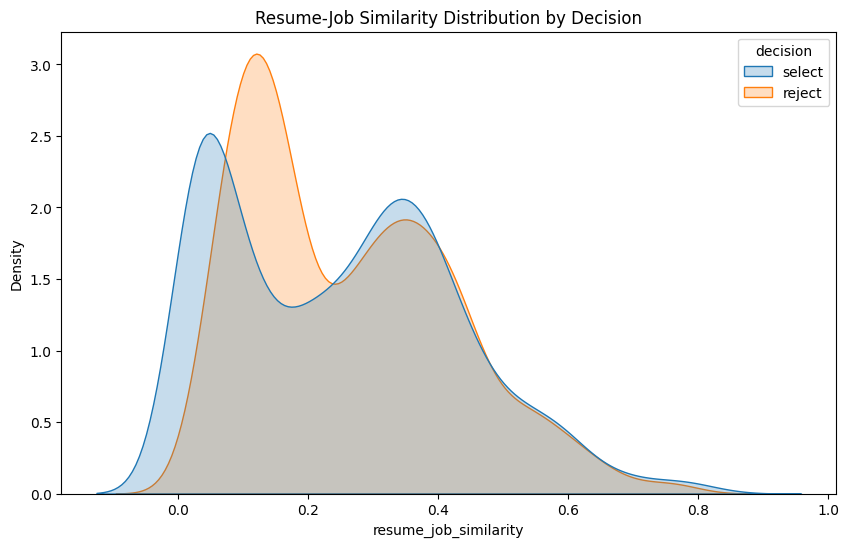

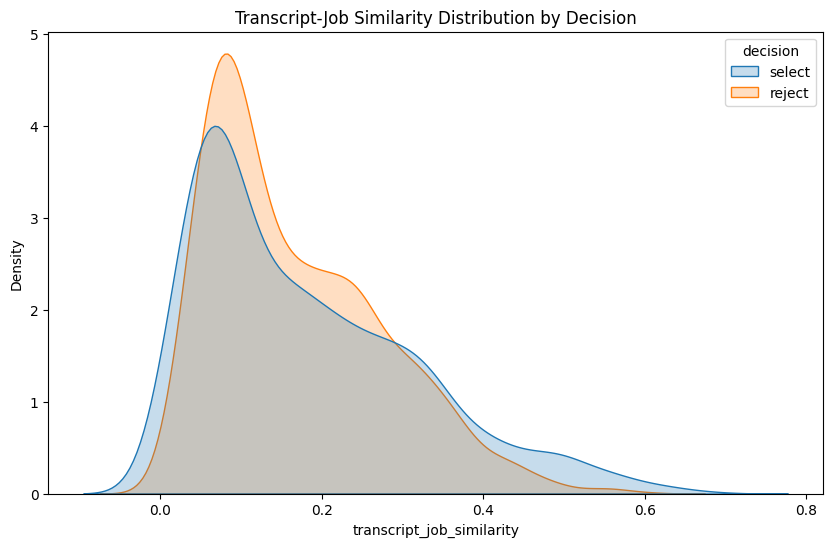

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=final_data, x='resume_job_similarity', hue='decision', fill=True, common_norm=False)
plt.title("Resume-Job Similarity Distribution by Decision")
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=final_data, x='transcript_job_similarity', hue='decision', fill=True, common_norm=False)
plt.title("Transcript-Job Similarity Distribution by Decision")
plt.show()


<ipython-input-40-dffe48924c95>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_data, y='num_words_in_transcript', x='role', palette='Set3')


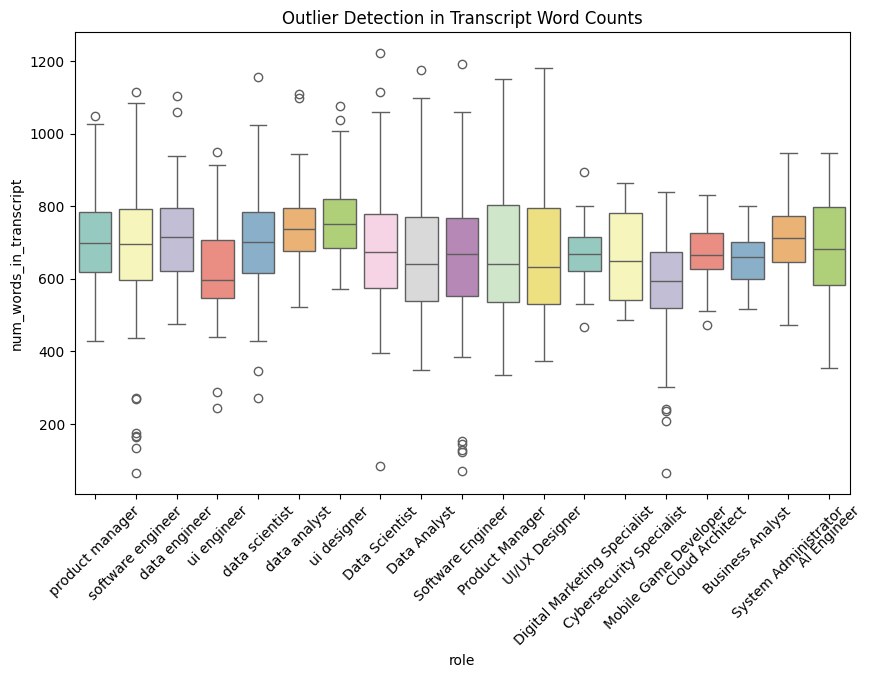

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_data, y='num_words_in_transcript', x='role', palette='Set3')
plt.title("Outlier Detection in Transcript Word Counts")
plt.xticks(rotation=45)
plt.show()
